# Setup

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
%cd /content/drive/MyDrive/Colab Notebooks/cs230/womens_edu

/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu


In [ ]:
import argparse
import os

import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   ../sustainbench/sustainbench/download_datasets.py
	modified:   womens_edu_regressor.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	../data_preprocessing.ipynb
	../sustainbench/dhs/
	data/

no changes added to commit (use "git add" and/or "git commit -a")


In [39]:
!git config --global user.email "disaaldan@gmail.com"
!git config --global user.name "disaalda"

In [43]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu'

In [42]:
!git add /womens_edu_regressor.ipynb womens_edu/data_preprocessing.ipynb

fatal: /womens_edu_regressor.ipynb: '/womens_edu_regressor.ipynb' is outside repository


# Satellite Imagery

## Read In Data

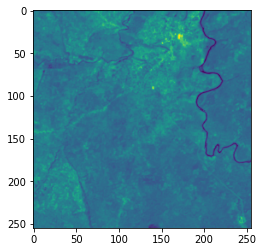

In [ ]:
dfile = "data/dhs_TD_ZW/ZM-2007-5#/ZM-2007-5#-00000320.npz"
images = np.load(dfile)['x']
images.shape
plt.ion()
plt.figure()
plt.imshow(images[3])

In [ ]:
images.shape

(8, 255, 255)

## Create a Dataset with Labels and Image Path

In [ ]:
dataset_root_dir = '/content/drive/MyDrive/Colab Notebooks/cs230/womens_edu/data/'

In [ ]:
df = pd.read_csv(os.path.join(dataset_root_dir, 'dhs_final_labels.csv'))
df['survey'] = df['DHSID_EA'].str[:10]
df['cc'] = df['DHSID_EA'].str[:2]
df['path'] = dataset_root_dir + '/dhs_TD_ZW/' + df['survey'] + '/' + df['DHSID_EA'] + '.npz'

In [ ]:
df.head()

,DHSID_EA,cname,year,lat,lon,n_asset,asset_index,n_water,water_index,n_sanitation,...,women_bmi,n_women_edu,n_women_bmi,cluster_id,adm1fips,adm1dhs,urban,survey,cc,path
0,AL-2008-5#-00000001,AL,2008,40.822652,19.838321,18.0,2.430596,18.0,3.444444,18.0,...,24.365000,18.0,18.0,1,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
1,AL-2008-5#-00000002,AL,2008,40.696846,20.007555,20.0,2.867678,20.0,4.700000,20.0,...,23.104000,20.0,20.0,2,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
2,AL-2008-5#-00000003,AL,2008,40.750037,19.974262,18.0,2.909049,18.0,4.500000,18.0,...,22.387778,18.0,18.0,3,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
3,AL-2008-5#-00000004,AL,2008,40.798931,19.863338,19.0,2.881122,19.0,4.947368,19.0,...,27.084500,21.0,20.0,4,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...
4,AL-2008-5#-00000005,AL,2008,40.746123,19.843885,19.0,2.546830,19.0,4.684211,19.0,...,24.523125,16.0,16.0,5,NaN,9999,R,AL-2008-5#,AL,/content/drive/MyDrive/Colab Notebooks/cs230/w...


In [ ]:
# subset a dataset with just 'ZM'
df_zm = df[ df['cc']=='ZM' ]
zm_path_years = df_zm[['DHSID_EA', 'path', 'year']].apply(tuple, axis=1)
df_zm.set_index('DHSID_EA', verify_integrity=True, inplace=True)

In [ ]:
df_zm.head()

,cname,year,lat,lon,n_asset,asset_index,n_water,water_index,n_sanitation,sanitation_index,...,women_bmi,n_women_edu,n_women_bmi,cluster_id,adm1fips,adm1dhs,urban,survey,cc,path
DHSID_EA,,,,,,,,,,,,,,,,,,,,,
ZM-2007-5#-00000001,ZM,2007,-16.795975,26.975610,23.0,2.806357,23.0,5.000000,23.0,4.913043,...,25.182500,30.0,28.0,1,ZA04,8,U,ZM-2007-5#,ZM,/content/drive/MyDrive/Colab Notebooks/cs230/w...
ZM-2007-5#-00000002,ZM,2007,-13.036608,26.111080,6.0,-2.626596,6.0,2.500000,6.0,1.833333,...,NaN,5.0,NaN,2,ZA01,7,R,ZM-2007-5#,ZM,/content/drive/MyDrive/Colab Notebooks/cs230/w...
ZM-2007-5#-00000003,ZM,2007,-14.248170,31.336041,23.0,1.577803,23.0,5.000000,23.0,3.565217,...,22.670333,33.0,30.0,3,ZA06,3,U,ZM-2007-5#,ZM,/content/drive/MyDrive/Colab Notebooks/cs230/w...
ZM-2007-5#-00000004,ZM,2007,-10.220802,31.149618,22.0,-0.226965,22.0,3.954545,22.0,3.363636,...,22.109000,32.0,30.0,4,ZA07,6,U,ZM-2007-5#,ZM,/content/drive/MyDrive/Colab Notebooks/cs230/w...
ZM-2007-5#-00000005,ZM,2007,-14.376148,23.285022,19.0,-2.521934,19.0,3.526316,19.0,1.263158,...,21.828333,22.0,18.0,5,ZA03,9,R,ZM-2007-5#,ZM,/content/drive/MyDrive/Colab Notebooks/cs230/w...


In [ ]:
zm_path_years

114662    (ZM-2007-5#-00000001, /content/drive/MyDrive/C...
114663    (ZM-2007-5#-00000002, /content/drive/MyDrive/C...
114664    (ZM-2007-5#-00000003, /content/drive/MyDrive/C...
114665    (ZM-2007-5#-00000004, /content/drive/MyDrive/C...
114666    (ZM-2007-5#-00000005, /content/drive/MyDrive/C...
                                ...                        
116230    (ZM-2018-7#-00000541, /content/drive/MyDrive/C...
116231    (ZM-2018-7#-00000542, /content/drive/MyDrive/C...
116232    (ZM-2018-7#-00000543, /content/drive/MyDrive/C...
116233    (ZM-2018-7#-00000544, /content/drive/MyDrive/C...
116234    (ZM-2018-7#-00000545, /content/drive/MyDrive/C...
Length: 1573, dtype: object

In [ ]:
label_cols = ['women_edu', 'path']

df_zm[label_cols].head()

,women_edu,path
DHSID_EA,,
ZM-2007-5#-00000001,10.733333,/content/drive/MyDrive/Colab Notebooks/cs230/w...
ZM-2007-5#-00000002,4.600000,/content/drive/MyDrive/Colab Notebooks/cs230/w...
ZM-2007-5#-00000003,11.272727,/content/drive/MyDrive/Colab Notebooks/cs230/w...
ZM-2007-5#-00000004,7.687500,/content/drive/MyDrive/Colab Notebooks/cs230/w...
ZM-2007-5#-00000005,5.818182,/content/drive/MyDrive/Colab Notebooks/cs230/w...


# Street-Level Imagery